In [1]:
from bs4 import BeautifulSoup as bs
import re
import requests
import pandas as pd

# Store all data rows as dictionaries
all_rows = []

# Loop through 100 pages
for page in range(1, 101):
    print(f"Scraping page {page}...")
    url = f"https://housing.com/in/buy/hyderabad/hyderabad?page={page}"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Failed to retrieve page {page}, skipping...")
        continue

    soup = bs(response.text, 'html.parser')

    titles = soup.find_all('div', class_='title-style')
    subtitles = soup.find_all('h2', class_='subtitle-style')
    prices = soup.find_all('div', class_='T_blackText _c8dlk8 _7l1ulh T_descriptionStyle _t91dk0 _r31e5h _g3exct _csbfng _bx1t02')
    areas = soup.find_all('div', class_="_c81fwx _cs1nn1 _g38jkm _fr1ti3 _vy1wug _7ls3je _h312gs _kbqmn7od T_dataPointStyle")
    sellers = soup.find_all('div', class_=['sellerName-label', 'seller-subtitle'])

    # Get max listings on page to avoid index errors
    num_listings = min(len(titles), len(subtitles), len(prices), len(areas))

    for i in range(num_listings):
        name = titles[i].text.strip()
        subtitle = subtitles[i].text.strip()
        price = prices[i].text.strip()
        single_price = re.search(r"₹[\d,.]+\s*[A-Za-z]*", price).group()
        area_text = areas[i].text.strip()

        bhk = re.search(r"\d\sBHK", subtitle)
        prop_type = re.search(r"(Apartment|Flat|Independent Houses|Villa|PGs)", subtitle)
        location = subtitle.split("in ", 1)[1].strip() if "in " in subtitle else None

        size = re.search(r"\d[\d,]*\s+sq\.ft", area_text)
        status = re.search(r"(Under Construction|Ready to Move)", area_text)
        delivery = re.search(r"[A-Za-z]+,?\s+\d{4}", area_text)

        listed_by = sellers[i].text.strip() if i < len(sellers) else None

        all_rows.append({
            "Name": name,
            "Location": location,
            "BHK": bhk.group() if bhk else None,
            "Type": prop_type.group() if prop_type else None,
            "Price": single_price,
            "Size": size.group() if size else None,
            "Status": status.group() if status else None,
            "Delivery Date": delivery.group() if delivery else None,
            "Listed By": listed_by
        })

# Convert to DataFrame
df = pd.DataFrame(all_rows)

# Save and preview
df.to_csv("hyderabad_real_estate.csv", index=False)
print("Scraping completed and saved to CSV!")

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [2]:
df

,Name,Location,BHK,Type,Price,Size,Status,Delivery Date,Listed By
0,Sreenidhi Neocity,Sadasivpet,None,None,₹36.07 L,None,None,"Jun, 2026",Ananthaa Spaces
1,The Cascades Neopolis,Kokapet,5 BHK,Flat,₹39.59 L,4825 sq.ft,Under Construction,"Mar, 2030",Seller
2,Casagrand Belair,Gowdavalli,4 BHK,Villa,₹43.99 L,3812 sq.ft,Under Construction,"Apr, 2028",GHR Lakshmi Infra and Urban Blocks Realty
3,Suchirindia The Tales of Greek,Shamshabad,2 BHK,Flat,₹48.39 L,945 sq.ft,Ready to Move,"Feb, 2025",Developer + 2 more
4,Casagrand GS Infinity,Attapur,4 BHK,Villa,₹54.99 L,3917 sq.ft,Under Construction,"Apr, 2030",Casagrand Builder Private Limited
...,...,...,...,...,...,...,...,...,...
534,DSR Skymarq,Puppalaguda,4 BHK,Flat,₹16.25 L,5454 sq.ft,Under Construction,"May, 2028",Seller
535,Cosmo Celesse,Mirkhanpet,None,None,₹19.49 L,None,None,"Nov, 2024",Raj Kumar
536,Myscape Otomo,Gandipet,4 BHK,Flat,₹22.74 L,5041 sq.ft,Under Construction,"Dec, 2025",Seller
537,Sri Sai Krishna Prime,Kondapur,3 BHK,Flat,₹25.99 L,2210 sq.ft,Ready to Move,"Nov, 2024",Praveen Reddy


In [3]:
df['Listed By'] = df['Listed By'].str.replace(r"\+\s*\d+\s*more", "", regex=True).str.strip()

In [4]:
df

,Name,Location,BHK,Type,Price,Size,Status,Delivery Date,Listed By
0,Sreenidhi Neocity,Sadasivpet,None,None,₹36.07 L,None,None,"Jun, 2026",Ananthaa Spaces
1,The Cascades Neopolis,Kokapet,5 BHK,Flat,₹39.59 L,4825 sq.ft,Under Construction,"Mar, 2030",Seller
2,Casagrand Belair,Gowdavalli,4 BHK,Villa,₹43.99 L,3812 sq.ft,Under Construction,"Apr, 2028",GHR Lakshmi Infra and Urban Blocks Realty
3,Suchirindia The Tales of Greek,Shamshabad,2 BHK,Flat,₹48.39 L,945 sq.ft,Ready to Move,"Feb, 2025",Developer
4,Casagrand GS Infinity,Attapur,4 BHK,Villa,₹54.99 L,3917 sq.ft,Under Construction,"Apr, 2030",Casagrand Builder Private Limited
...,...,...,...,...,...,...,...,...,...
534,DSR Skymarq,Puppalaguda,4 BHK,Flat,₹16.25 L,5454 sq.ft,Under Construction,"May, 2028",Seller
535,Cosmo Celesse,Mirkhanpet,None,None,₹19.49 L,None,None,"Nov, 2024",Raj Kumar
536,Myscape Otomo,Gandipet,4 BHK,Flat,₹22.74 L,5041 sq.ft,Under Construction,"Dec, 2025",Seller
537,Sri Sai Krishna Prime,Kondapur,3 BHK,Flat,₹25.99 L,2210 sq.ft,Ready to Move,"Nov, 2024",Praveen Reddy


In [5]:
df.isnull().sum()

Name               0
Location           0
BHK              104
Type             103
Price              0
Size             106
Status           105
Delivery Date      0
Listed By          0
dtype: int64

In [6]:
df['BHK']=df['BHK'].fillna(df['BHK'].mode()[0])

In [7]:
df['BHK'] = df['BHK'].str.extract(r'(\d+)').astype('Int64')

In [8]:
df["Type"]=df["Type"].fillna(df["Type"].mode()[0])

In [9]:
df["Status"]=df["Status"].fillna(df["Status"].mode()[0])

In [10]:
df['Size'] = df['Size'].str.replace("sq.ft","", regex=False).str.strip()

In [11]:
df['Delivery_Month'] = df['Delivery Date'].str.extract(r'([A-Za-z]+)')
df['Delivery_Year'] = df['Delivery Date'].str.extract(r'(\d{4})').astype('Int64')

In [12]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
# Group by BHK and get average size
avg_size_per_bhk = df.groupby('BHK')['Size'].mean().round()
# Fill missing values using BHK-wise average
df['Size'] = df.apply(
    lambda row: avg_size_per_bhk[row['BHK']] if pd.isna(row['Size']) and row['BHK'] in avg_size_per_bhk else row['Size'],
    axis=1)

In [13]:
df.isnull().sum()

Name              0
Location          0
BHK               0
Type              0
Price             0
Size              0
Status            0
Delivery Date     0
Listed By         0
Delivery_Month    0
Delivery_Year     0
dtype: int64

In [14]:
def convert_price_to_lakhs(price):
    price = price.replace("₹", "").replace(",", "").strip() 
    # Convert crores to lakhs
    if 'Cr' in price:
        price = price.replace('Cr', '')
        return float(price) * 100
    elif 'L' in price:
        price = price.replace('L', '')
        return float(price)
df['Price'] = df['Price'].apply(convert_price_to_lakhs)

In [15]:
df.rename(columns={
    'Size': 'Size (in sqft)',
    'Price': 'Price (in lakhs)'
}, inplace=True)

In [16]:
df

,Name,Location,BHK,Type,Price (in lakhs),Size (in sqft),Status,Delivery Date,Listed By,Delivery_Month,Delivery_Year
0,Sreenidhi Neocity,Sadasivpet,3,Flat,36.07,2090.0,Under Construction,"Jun, 2026",Ananthaa Spaces,Jun,2026
1,The Cascades Neopolis,Kokapet,5,Flat,39.59,4825.0,Under Construction,"Mar, 2030",Seller,Mar,2030
2,Casagrand Belair,Gowdavalli,4,Villa,43.99,3812.0,Under Construction,"Apr, 2028",GHR Lakshmi Infra and Urban Blocks Realty,Apr,2028
3,Suchirindia The Tales of Greek,Shamshabad,2,Flat,48.39,945.0,Ready to Move,"Feb, 2025",Developer,Feb,2025
4,Casagrand GS Infinity,Attapur,4,Villa,54.99,3917.0,Under Construction,"Apr, 2030",Casagrand Builder Private Limited,Apr,2030
...,...,...,...,...,...,...,...,...,...,...,...
534,DSR Skymarq,Puppalaguda,4,Flat,16.25,5454.0,Under Construction,"May, 2028",Seller,May,2028
535,Cosmo Celesse,Mirkhanpet,3,Flat,19.49,2090.0,Under Construction,"Nov, 2024",Raj Kumar,Nov,2024
536,Myscape Otomo,Gandipet,4,Flat,22.74,5041.0,Under Construction,"Dec, 2025",Seller,Dec,2025
537,Sri Sai Krishna Prime,Kondapur,3,Flat,25.99,2210.0,Ready to Move,"Nov, 2024",Praveen Reddy,Nov,2024


In [17]:
import seaborn as sns

<Axes: xlabel='Price_per_sqft', ylabel='Count'>

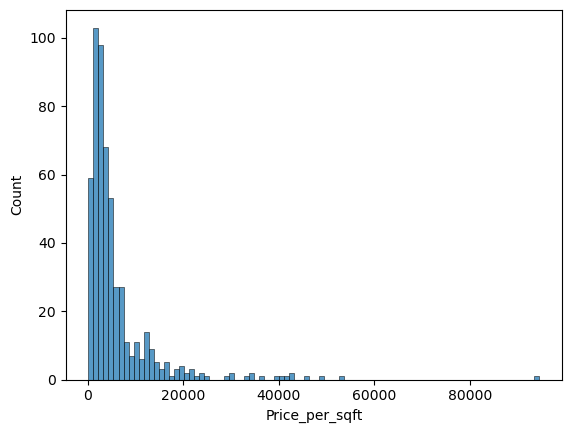

In [18]:
df['Price_per_sqft'] = df['Price (in lakhs)'] * 100000 / df['Size (in sqft)']
sns.histplot(x=df['Price_per_sqft'])

In [19]:
df=df[df['Price_per_sqft']<50000]
df

,Name,Location,BHK,Type,Price (in lakhs),Size (in sqft),Status,Delivery Date,Listed By,Delivery_Month,Delivery_Year,Price_per_sqft
0,Sreenidhi Neocity,Sadasivpet,3,Flat,36.07,2090.0,Under Construction,"Jun, 2026",Ananthaa Spaces,Jun,2026,1725.837321
1,The Cascades Neopolis,Kokapet,5,Flat,39.59,4825.0,Under Construction,"Mar, 2030",Seller,Mar,2030,820.518135
2,Casagrand Belair,Gowdavalli,4,Villa,43.99,3812.0,Under Construction,"Apr, 2028",GHR Lakshmi Infra and Urban Blocks Realty,Apr,2028,1153.987408
3,Suchirindia The Tales of Greek,Shamshabad,2,Flat,48.39,945.0,Ready to Move,"Feb, 2025",Developer,Feb,2025,5120.634921
4,Casagrand GS Infinity,Attapur,4,Villa,54.99,3917.0,Under Construction,"Apr, 2030",Casagrand Builder Private Limited,Apr,2030,1403.880521
...,...,...,...,...,...,...,...,...,...,...,...,...
534,DSR Skymarq,Puppalaguda,4,Flat,16.25,5454.0,Under Construction,"May, 2028",Seller,May,2028,297.946461
535,Cosmo Celesse,Mirkhanpet,3,Flat,19.49,2090.0,Under Construction,"Nov, 2024",Raj Kumar,Nov,2024,932.535885
536,Myscape Otomo,Gandipet,4,Flat,22.74,5041.0,Under Construction,"Dec, 2025",Seller,Dec,2025,451.100972
537,Sri Sai Krishna Prime,Kondapur,3,Flat,25.99,2210.0,Ready to Move,"Nov, 2024",Praveen Reddy,Nov,2024,1176.018100


<Axes: xlabel='Price_per_sqft', ylabel='Count'>

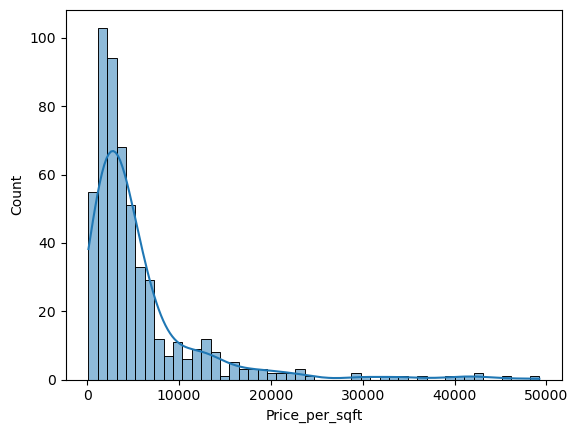

In [20]:
sns.histplot(x=df['Price_per_sqft'],kde=True)

<Axes: xlabel='BHK', ylabel='Count'>

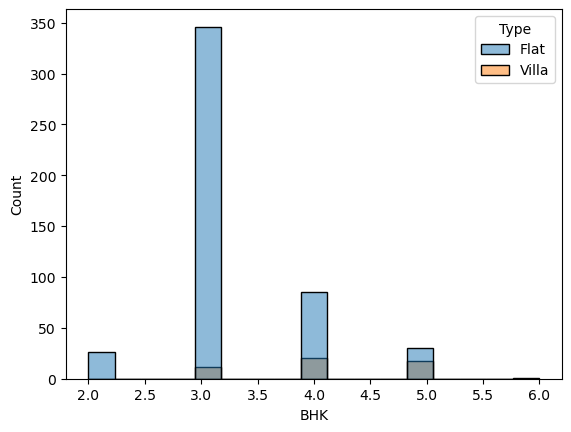

In [21]:
sns.histplot(x=df["BHK"],hue=df["Type"])

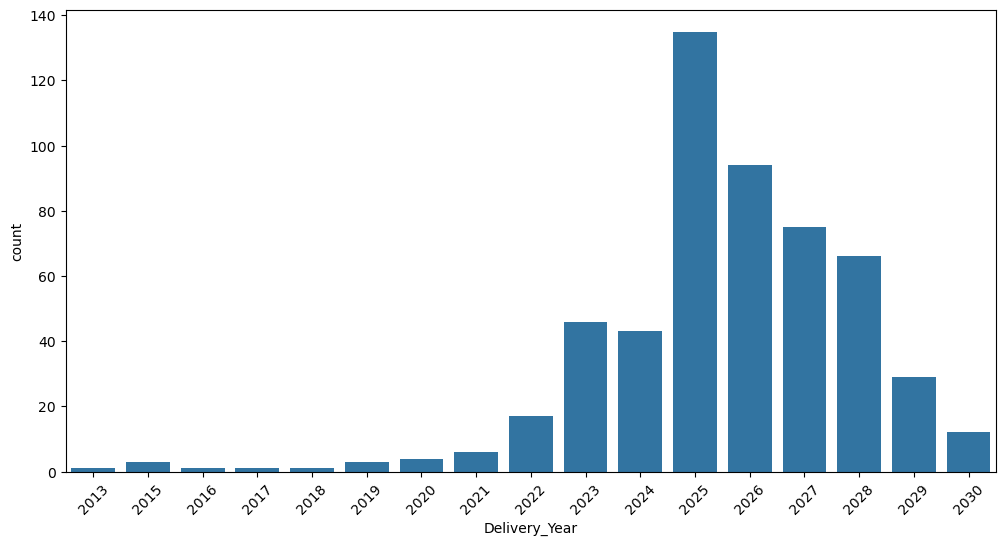

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x=df['Delivery_Year'])
plt.xticks(rotation=45) 
plt.show()

<Axes: xlabel='BHK', ylabel='Size (in sqft)'>

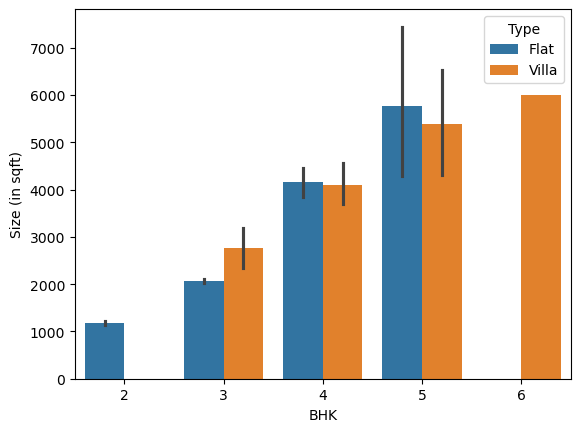

In [23]:
sns.barplot(x="BHK",y="Size (in sqft)",data=df,hue="Type")

<Axes: xlabel='Size (in sqft)', ylabel='Price (in lakhs)'>

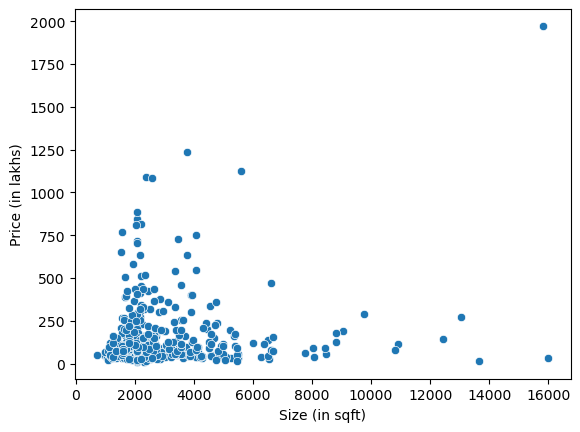

In [24]:
sns.scatterplot(x=df["Size (in sqft)"],y=df['Price (in lakhs)'])

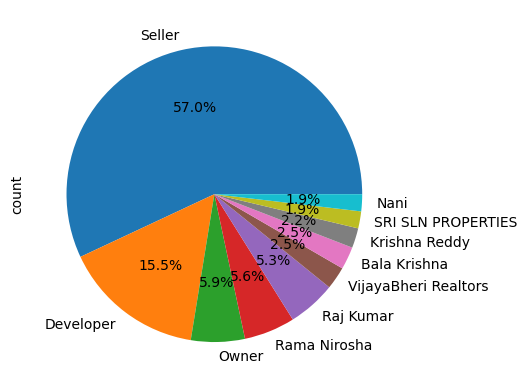

In [25]:
df['Listed By'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Price (in lakhs)', ylabel='Density'>

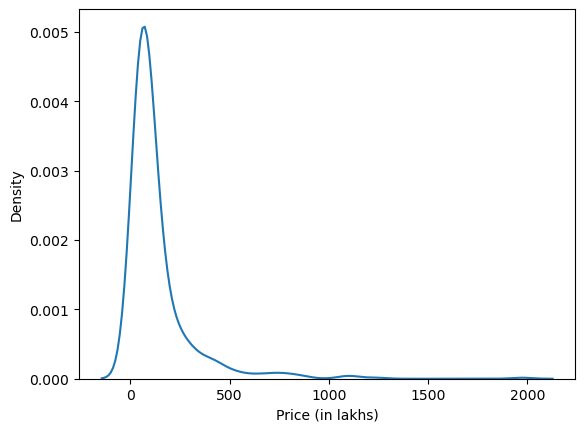

In [26]:
sns.kdeplot(x='Price (in lakhs)',data=df)

<Axes: xlabel='Type', ylabel='Price (in lakhs)'>

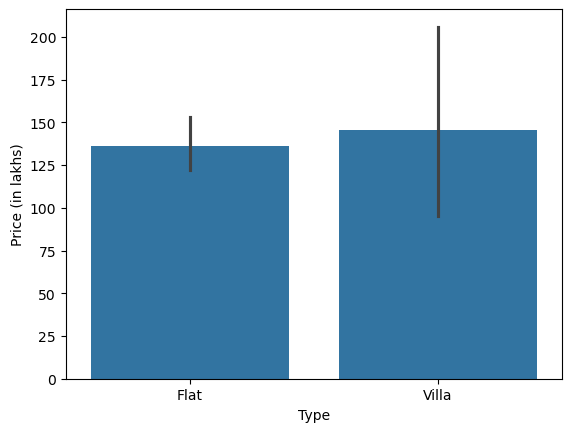

In [27]:
sns.barplot(x=df["Type"],y=df["Price (in lakhs)"])